# 프로젝트 1 : 부동산 데이터 분석

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('./data/한국자산관리공사_국유부동산 매각현황_20221231.csv', encoding='cp949') 

In [4]:
df.head()

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141317 entries, 0 to 141316
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   연도구분        141317 non-null  int64  
 1   지역구분        141317 non-null  object 
 2   소재지명        141317 non-null  object 
 3   재산구분        141317 non-null  object 
 4   공부지목        141316 non-null  object 
 5   대장면적(제곱미터)  141317 non-null  float64
 6   대장금액(원)     141317 non-null  float64
 7   처분구분명       141317 non-null  object 
 8   계약일자        141317 non-null  object 
 9   부점명         141317 non-null  object 
 10  팀명          141232 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 11.9+ MB


### 데이터의 feature 

    * 연도구분
    * 지역구분
    * 소재지명
    * 재산구분 : 재산용도 구분
    * 공부지목 : 토지의 지목
    * 대장면적(제곱미터) : 토지면적
    * 대장금액(원) : 금액
    * 처분구분명 : 처분구분
    * 계약일자
    * 부점명 : 부서이름
    * 팀명

In [6]:
df.isnull().sum()

연도구분           0
지역구분           0
소재지명           0
재산구분           0
공부지목           1
대장면적(제곱미터)     0
대장금액(원)        0
처분구분명          0
계약일자           0
부점명            0
팀명            85
dtype: int64

### 결측치 확인
    * 공부지목 : 1
    * 팀명 : 85

## 0. 데이터 클리닝
    (1) 완결성 : 결측값 x
    (2) 유일성 : 동일한 데이터가 불필요하게 중복 x
    (3) 통일성 : 동일한 형식으로 저장 
    (4) 정확성 : 데이터가 정확 

### (1) 완결성 

In [7]:
df['팀명'].unique()

array(['국유재산관리1팀', '국유울산팀', '국유재산관리2팀', '국유춘천팀', '국유목포팀', '국유여수팀',
       '국유제주팀', '국유팀', '국유광주2팀', '국유원주팀', '국유진주팀', '내포지부', '국유재산관리팀',
       '국유 충주팀', '재산관리3팀', '국유군산팀', '국유재산관리3팀', '국유 안동팀', '국유 포항팀',
       '의정부팀', '재산관리2팀', '국유광주1팀', '국유평택팀', '재산관리1팀', '재산관리5팀', '국유통영팀',
       '재산관리4팀', '재산관리6팀', '팀미정', '국유목포지부', '국유여수지부', '국유제주지부', '포항지부',
       '안동지부', '국유재산1팀', '국유재산3팀', '의정부지부', '국유광주3팀', '국유재산2팀', '울산지부',
       '국유재산관리4팀', '기획관리팀', '원주지부', '국유1팀', '국유2팀', '춘천지부', '국유진주지부',
       '국유통영지부', '국유광주4팀', '국유목포지사', '국유여수지사', '내포지사', '충주지사', '군산지사',
       '국유진주지사', '국유통영지사', '포항지사', '안동지사', '국유제주지사', '울산지사', '국유재산관리5팀',
       '평택지사', '의정부지사', '원주지사', '춘천지사', '해안면무주지국유화지원추진단', nan],
      dtype=object)

In [8]:
df.loc[df['공부지목'].isna()]

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
138461,2022,전라남도,전라남도 진도군 임회면 고정리 925-15,토지,NaN,84.0,141960.0,처분(매각수의),2022-10-20,광주전남지역본부,국유목포지사


In [9]:
df['공부지목'].unique()

array(['전', '임야', '답', '도로', '대', '묘지', '확인불가', '잡종지', '하천', '주유소용지',
       '과수원', '목장용지', '구거', '유지', '공장용지', '철도용지', '수도용지', '제방', '주차장',
       '공원', '학교용지', '창고용지', '양어장', '종교용지', '체육용지', '유원지', '사적지', '염전',
       '광천지', nan], dtype=object)

In [10]:
m = df.loc[df['팀명'].isna()]

In [11]:
m

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
129368,2022,부산광역시,부산광역시 금정구 서동 228-28,토지,구거,17.0,137360.0,처분(매각수의),2022-05-02,부산지역본부,NaN
131131,2022,울산광역시,울산광역시 북구 양정동 771-3,토지,하천,103.0,67928500.0,처분(매각수의),2022-08-17,부산지역본부,NaN
131132,2022,울산광역시,울산광역시 북구 양정동 771-4,토지,구거,6.0,2676000.0,처분(매각수의),2022-08-17,부산지역본부,NaN
131133,2022,울산광역시,울산광역시 북구 양정동 771-7,토지,구거,48.0,31656000.0,처분(매각수의),2022-08-17,부산지역본부,NaN
131134,2022,울산광역시,울산광역시 북구 양정동 771-18,토지,구거,156.0,102882000.0,처분(매각수의),2022-08-17,부산지역본부,NaN
...,...,...,...,...,...,...,...,...,...,...,...
140349,2022,경상남도,경상남도 김해시 생림면 생림리 400,토지,답,1853.0,43360200.0,처분(매각수의),2022-03-24,경남지역본부,NaN
140350,2022,경상남도,경상남도 김해시 생림면 생림리 964-27,토지,답,700.0,15190000.0,처분(매각수의),2022-03-24,경남지역본부,NaN
140351,2022,경상남도,경상남도 김해시 생림면 생림리 964-30,토지,답,289.0,6271300.0,처분(매각수의),2022-03-24,경남지역본부,NaN
140352,2022,경상남도,경상남도 김해시 생림면 생림리 964-32,토지,답,201.0,4361700.0,처분(매각수의),2022-03-24,경남지역본부,NaN


In [12]:
df['공부지목'] = ['확인불가' if w != w else w for w in df['공부지목']]

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

연도구분          0
지역구분          0
소재지명          0
재산구분          0
공부지목          0
대장면적(제곱미터)    0
대장금액(원)       0
처분구분명         0
계약일자          0
부점명           0
팀명            0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141232 entries, 0 to 141316
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   연도구분        141232 non-null  int64  
 1   지역구분        141232 non-null  object 
 2   소재지명        141232 non-null  object 
 3   재산구분        141232 non-null  object 
 4   공부지목        141232 non-null  object 
 5   대장면적(제곱미터)  141232 non-null  float64
 6   대장금액(원)     141232 non-null  float64
 7   처분구분명       141232 non-null  object 
 8   계약일자        141232 non-null  object 
 9   부점명         141232 non-null  object 
 10  팀명          141232 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 12.9+ MB


### (2) 유일성

In [16]:
u = df[df.duplicated(['소재지명']) == True]
u

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
284,2014,충청남도,충청남도 홍성군 광천읍 광천리 479-14,토지,대,319.00,1.180300e+08,처분(매각수의),2014-01-07,대전충남지역본부,내포지부
285,2014,충청남도,충청남도 홍성군 광천읍 광천리 241-2,토지,대,50.00,3.840000e+07,처분(매각수의),2014-01-07,대전충남지역본부,내포지부
286,2014,충청남도,충청남도 홍성군 광천읍 광천리 479-14,토지,대,319.00,1.180300e+08,처분(매각수의),2014-01-07,대전충남지역본부,내포지부
287,2014,충청남도,충청남도 홍성군 광천읍 광천리 479-14,토지,대,319.00,1.180300e+08,처분(매각수의),2014-01-07,대전충남지역본부,내포지부
288,2014,충청남도,충청남도 홍성군 광천읍 광천리 241-2,토지,대,50.00,3.840000e+07,처분(매각수의),2014-01-07,대전충남지역본부,내포지부
...,...,...,...,...,...,...,...,...,...,...,...
139953,2022,경상남도,경상남도 진주시 상대동 295-4,토지,대,3479.60,8.898674e+09,처분(사용승인),2022-06-28,경남지역본부,국유진주지사
139954,2022,경상남도,경상남도 진주시 상대동 295-4,건물,확인불가,3031.01,1.550352e+09,처분(사용승인),2022-06-28,경남지역본부,국유진주지사
139955,2022,경상남도,경상남도 진주시 상대동 295-4,토지,대,1517.60,3.881086e+09,처분(사용승인),2022-06-28,경남지역본부,국유진주지사
140781,2022,경상남도,경상남도 양산시 상북면 석계리 237-11,건물,확인불가,101.25,1.644300e+07,처분(매각수의),2022-04-22,부산지역본부,울산지사


In [17]:
u[u.duplicated(['대장면적(제곱미터)']) == True]

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
286,2014,충청남도,충청남도 홍성군 광천읍 광천리 479-14,토지,대,319.0,118030000.0,처분(매각수의),2014-01-07,대전충남지역본부,내포지부
287,2014,충청남도,충청남도 홍성군 광천읍 광천리 479-14,토지,대,319.0,118030000.0,처분(매각수의),2014-01-07,대전충남지역본부,내포지부
288,2014,충청남도,충청남도 홍성군 광천읍 광천리 241-2,토지,대,50.0,38400000.0,처분(매각수의),2014-01-07,대전충남지역본부,내포지부
1366,2014,충청남도,충청남도 홍성군 광천읍 광천리 237-55,토지,대,296.0,27824000.0,처분(매각수의),2014-01-23,대전충남지역본부,내포지부
1435,2014,충청남도,충청남도 홍성군 광천읍 광천리 237-55,토지,대,296.0,27824000.0,처분(매각수의),2014-01-27,대전충남지역본부,내포지부
...,...,...,...,...,...,...,...,...,...,...,...
134325,2022,경기도,경기도 포천시 신북면 가채리 629-1,토지,답,25.0,610000.0,처분(매각수의),2022-05-19,서울서부지역본부,의정부지사
136000,2022,충청남도,충청남도 천안시 동남구 유량동 36,건물,확인불가,1812.0,143737760.0,처분(사용승인),2022-09-01,대전충남지역본부,국유재산관리2팀
136002,2022,충청남도,충청남도 천안시 동남구 유량동 36,건물,확인불가,891.0,113585408.0,처분(사용승인),2022-09-01,대전충남지역본부,국유재산관리2팀
138045,2022,전라남도,전라남도 장흥군 용산면 상발리 109-1,건물,확인불가,33.0,5280000.0,처분(매각입찰),2022-09-23,광주전남지역본부,국유재산관리2팀


In [164]:
u[u.duplicated(['소재지명']) == True]

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
286,2014,충청남도,충청남도 홍성군 광천읍 광천리 479-14,토지,대,319.00,118030000.00,처분(매각수의),2014-01-07,대전충남지역본부,내포지부
287,2014,충청남도,충청남도 홍성군 광천읍 광천리 479-14,토지,대,319.00,118030000.00,처분(매각수의),2014-01-07,대전충남지역본부,내포지부
288,2014,충청남도,충청남도 홍성군 광천읍 광천리 241-2,토지,대,50.00,38400000.00,처분(매각수의),2014-01-07,대전충남지역본부,내포지부
1366,2014,충청남도,충청남도 홍성군 광천읍 광천리 237-55,토지,대,296.00,27824000.00,처분(매각수의),2014-01-23,대전충남지역본부,내포지부
1435,2014,충청남도,충청남도 홍성군 광천읍 광천리 237-55,토지,대,296.00,27824000.00,처분(매각수의),2014-01-27,대전충남지역본부,내포지부
...,...,...,...,...,...,...,...,...,...,...,...
136001,2022,충청남도,충청남도 천안시 동남구 유량동 36,건물,확인불가,121.60,930753.00,처분(사용승인),2022-09-01,대전충남지역본부,국유재산관리2팀
136002,2022,충청남도,충청남도 천안시 동남구 유량동 36,건물,확인불가,891.00,113585408.00,처분(사용승인),2022-09-01,대전충남지역본부,국유재산관리2팀
139953,2022,경상남도,경상남도 진주시 상대동 295-4,토지,대,3479.60,8898673698.00,처분(사용승인),2022-06-28,경남지역본부,국유진주지사
139954,2022,경상남도,경상남도 진주시 상대동 295-4,건물,확인불가,3031.01,1550351790.00,처분(사용승인),2022-06-28,경남지역본부,국유진주지사


### (3) 통일성 

In [18]:
df['연도구분'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [19]:
df['지역구분'].unique()

array(['전라북도', '울산광역시', '부산광역시', '강원도', '경상북도', '전라남도', '제주특별자치도', '충청남도',
       '경상남도', '대전광역시', '충청북도', '인천광역시', '세종특별자치시', '경기도', '대구광역시',
       '서울특별시', '광주광역시'], dtype=object)

In [20]:
df['소재지명'].unique()

array(['전라북도 정읍시 상동  725', '울산광역시 북구 천곡동  709-1',
       '전라북도 정읍시 산내면 종성리 727-21', ..., '제주특별자치도 서귀포시 표선면 세화리 2451-10',
       '제주특별자치도 서귀포시 표선면 토산리 32-3', '제주특별자치도 서귀포시 표선면 토산리 1033'],
      dtype=object)

In [21]:
df['재산구분'].unique()

array(['토지', '건물'], dtype=object)

In [22]:
df['공부지목'].unique()

array(['전', '임야', '답', '도로', '대', '묘지', '확인불가', '잡종지', '하천', '주유소용지',
       '과수원', '목장용지', '구거', '유지', '공장용지', '철도용지', '수도용지', '제방', '주차장',
       '공원', '학교용지', '창고용지', '양어장', '종교용지', '체육용지', '유원지', '사적지', '염전',
       '광천지'], dtype=object)

In [23]:
df['처분구분명'].unique()

array(['처분(매각수의)', '처분(무상관리전환)', '처분(매각입찰)', '처분(유상관리전환)', '처분(무상양여)',
       '처분(유상양여)', '처분(사용승인)', '처분(무상귀속)'], dtype=object)

In [24]:
df['부점명'].unique()

array(['전북지역본부', '국유재산관리부', '강원지역본부', '대구경북지역본부', '광주전남지역본부', '대전충남지역본부',
       '경남지역본부', '충북지역본부', '인천지역본부', '서울국유재산부', '경기지역본부', '서울서부지역본부',
       '서울동부지역본부', '부산지역본부', '국유재산기획처'], dtype=object)

In [25]:
df['팀명'].unique()

array(['국유재산관리1팀', '국유울산팀', '국유재산관리2팀', '국유춘천팀', '국유목포팀', '국유여수팀',
       '국유제주팀', '국유팀', '국유광주2팀', '국유원주팀', '국유진주팀', '내포지부', '국유재산관리팀',
       '국유 충주팀', '재산관리3팀', '국유군산팀', '국유재산관리3팀', '국유 안동팀', '국유 포항팀',
       '의정부팀', '재산관리2팀', '국유광주1팀', '국유평택팀', '재산관리1팀', '재산관리5팀', '국유통영팀',
       '재산관리4팀', '재산관리6팀', '팀미정', '국유목포지부', '국유여수지부', '국유제주지부', '포항지부',
       '안동지부', '국유재산1팀', '국유재산3팀', '의정부지부', '국유광주3팀', '국유재산2팀', '울산지부',
       '국유재산관리4팀', '기획관리팀', '원주지부', '국유1팀', '국유2팀', '춘천지부', '국유진주지부',
       '국유통영지부', '국유광주4팀', '국유목포지사', '국유여수지사', '내포지사', '충주지사', '군산지사',
       '국유진주지사', '국유통영지사', '포항지사', '안동지사', '국유제주지사', '울산지사', '국유재산관리5팀',
       '평택지사', '의정부지사', '원주지사', '춘천지사', '해안면무주지국유화지원추진단'], dtype=object)

In [26]:
# 수치형 데이터 3개 : (연도구분), 대장면적, 대장금액 
df.describe()

,연도구분,대장면적(제곱미터),대장금액(원)
count,141232.000000,1.412320e+05,1.412320e+05
mean,2017.635777,5.689740e+02,6.063625e+07
std,2.516402,9.297643e+03,1.518357e+09
min,2014.000000,0.000000e+00,0.000000e+00
25%,2016.000000,2.900000e+01,1.354665e+06
50%,2017.000000,9.600000e+01,5.103000e+06
75%,2020.000000,3.180000e+02,1.870400e+07
max,2022.000000,2.024292e+06,3.670000e+11


In [27]:
df[df['대장면적(제곱미터)'] == 0]

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
2601,2014,서울특별시,서울특별시 종로구 세종로 90-2,토지,대,0.0,2691000.0,처분(무상관리전환),2014-03-03,서울국유재산부,재산관리5팀
2685,2014,충청북도,충청북도 충주시 중앙탑면 용전리 291-3,토지,답,0.0,0.0,처분(매각수의),2014-03-05,충북지역본부,국유 충주팀
3124,2014,서울특별시,서울특별시 중구 소공동 50-19,토지,대,0.0,4620000.0,처분(매각수의),2014-03-18,서울국유재산부,재산관리6팀
4402,2014,경상남도,경상남도 통영시 도산면 수월리 599-2,토지,잡종지,0.0,0.0,처분(매각수의),2014-04-14,경남지역본부,국유통영팀
4907,2014,경상남도,경상남도 통영시 용남면 장평리 25-5,토지,잡종지,0.0,0.0,처분(매각수의),2014-04-24,경남지역본부,국유통영팀
...,...,...,...,...,...,...,...,...,...,...,...
125744,2021,경기도,경기도 동두천시 상패동 16-53,토지,대,0.0,4010.0,처분(매각수의),2021-06-11,서울서부지역본부,의정부지사
125745,2021,경기도,경기도 동두천시 상패동 14-66,토지,임야,0.0,2460.0,처분(매각수의),2021-06-11,서울서부지역본부,의정부지사
125746,2021,경기도,경기도 동두천시 상패동 14-68,토지,임야,0.0,180.0,처분(매각수의),2021-06-11,서울서부지역본부,의정부지사
125748,2021,경기도,경기도 동두천시 상패동 16-40,토지,전,0.0,4830.0,처분(매각수의),2021-06-11,서울서부지역본부,의정부지사


In [28]:
won = df[df['대장금액(원)'] == 0]
won

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
2685,2014,충청북도,충청북도 충주시 중앙탑면 용전리 291-3,토지,답,0.0,0.0,처분(매각수의),2014-03-05,충북지역본부,국유 충주팀
4402,2014,경상남도,경상남도 통영시 도산면 수월리 599-2,토지,잡종지,0.0,0.0,처분(매각수의),2014-04-14,경남지역본부,국유통영팀
4907,2014,경상남도,경상남도 통영시 용남면 장평리 25-5,토지,잡종지,0.0,0.0,처분(매각수의),2014-04-24,경남지역본부,국유통영팀
5167,2014,대전광역시,대전광역시 동구 인동 242-19,토지,대,0.0,0.0,처분(매각수의),2014-04-29,대전충남지역본부,국유재산관리2팀
5182,2014,부산광역시,부산광역시 사하구 감천동 산 99-42,토지,임야,0.0,0.0,처분(매각수의),2014-04-29,국유재산관리부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
37869,2016,전라남도,전라남도 장성군 황룡면 신호리 227-1,토지,대,0.0,0.0,처분(매각수의),2016-03-03,광주전남지역본부,국유광주1팀
37870,2016,전라남도,전라남도 장성군 황룡면 신호리 228-1,토지,대,0.0,0.0,처분(매각수의),2016-03-03,광주전남지역본부,국유광주1팀
42071,2016,강원도,강원도 강릉시 구정면 제비리 1064-2,토지,전,0.0,0.0,처분(매각수의),2016-04-21,강원지역본부,국유팀
42131,2016,강원도,강원도 태백시 혈동 260-70,토지,전,0.0,0.0,처분(매각수의),2016-03-30,강원지역본부,국유팀


In [29]:
won[won['대장면적(제곱미터)'] != 0]

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명


In [30]:
won['처분구분명'].unique()

array(['처분(매각수의)', '처분(무상양여)', '처분(매각입찰)', '처분(무상관리전환)'], dtype=object)

In [31]:
won[won['처분구분명'] == '처분(매각입찰)']

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
6923,2014,인천광역시,인천광역시 중구 운서동 2788-6,토지,대,0.0,0.0,처분(매각입찰),2014-06-05,인천지역본부,국유재산관리팀
6926,2014,인천광역시,인천광역시 중구 운서동 2788-6,토지,대,0.0,0.0,처분(매각입찰),2014-06-05,인천지역본부,국유재산관리팀
6928,2014,인천광역시,인천광역시 중구 운서동 2788-6,토지,대,0.0,0.0,처분(매각입찰),2014-06-05,인천지역본부,국유재산관리팀
6930,2014,인천광역시,인천광역시 중구 운서동 2788-6,토지,대,0.0,0.0,처분(매각입찰),2014-06-05,인천지역본부,국유재산관리팀
9102,2014,인천광역시,인천광역시 중구 운서동 2788-6,토지,대,0.0,0.0,처분(매각입찰),2014-07-16,인천지역본부,국유재산관리팀
9104,2014,인천광역시,인천광역시 중구 운서동 2788-6,토지,대,0.0,0.0,처분(매각입찰),2014-07-16,인천지역본부,국유재산관리팀
10415,2014,인천광역시,인천광역시 중구 운서동 2788-6,토지,대,0.0,0.0,처분(매각입찰),2014-08-13,인천지역본부,국유재산관리팀
12716,2014,인천광역시,인천광역시 중구 운서동 2788-6,토지,대,0.0,0.0,처분(매각입찰),2014-10-08,인천지역본부,국유재산관리팀
12718,2014,인천광역시,인천광역시 중구 운서동 2788-6,토지,대,0.0,0.0,처분(매각입찰),2014-10-08,인천지역본부,국유재산관리팀
12720,2014,인천광역시,인천광역시 중구 운서동 2788-6,토지,대,0.0,0.0,처분(매각입찰),2014-10-08,인천지역본부,국유재산관리팀


In [32]:
land = df[df['대장면적(제곱미터)'] != 0]
land

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [33]:
index = []

for i in range(140952):
    index.append(i)

In [34]:
land.index = index

In [35]:
land

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
140947,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
140948,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
140949,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
140950,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [349]:
land.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140952 entries, 0 to 140951
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   연도구분        140952 non-null  int64  
 1   지역구분        140952 non-null  object 
 2   소재지명        140952 non-null  object 
 3   재산구분        140952 non-null  object 
 4   공부지목        140952 non-null  object 
 5   대장면적(제곱미터)  140952 non-null  float64
 6   대장금액(원)     140952 non-null  float64
 7   처분구분명       140952 non-null  object 
 8   계약일자        140952 non-null  object 
 9   부점명         140952 non-null  object 
 10  팀명          140952 non-null  object 
 11  부서와 팀명      140952 non-null  object 
 12  면적 대비 금액    140952 non-null  float64
 13  seoul       140952 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 16.1+ MB


In [36]:
# sns 차트 한글깨짐 해결 
plt.rcParams['font.family'] = 'Malgun Gothic'

<Axes: xlabel='지역구분', ylabel='count'>

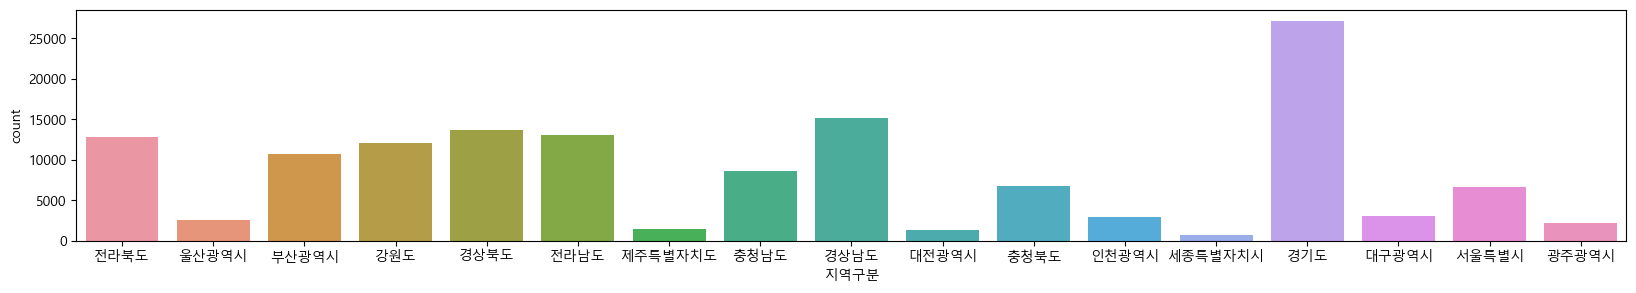

In [348]:
fig, ax = plt.subplots(1, 1, figsize=(20, 3))
sns.countplot(x='지역구분', data=land)

In [38]:
land['재산구분'].unique()

array(['토지', '건물'], dtype=object)

<Axes: xlabel='재산구분', ylabel='count'>

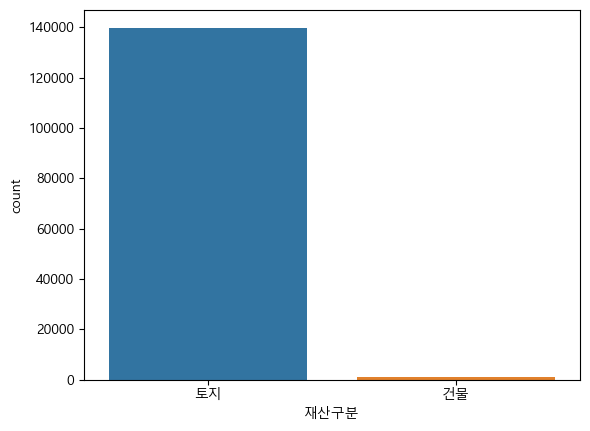

In [39]:
sns.countplot(x='재산구분', data=land)

<Axes: xlabel='공부지목', ylabel='count'>

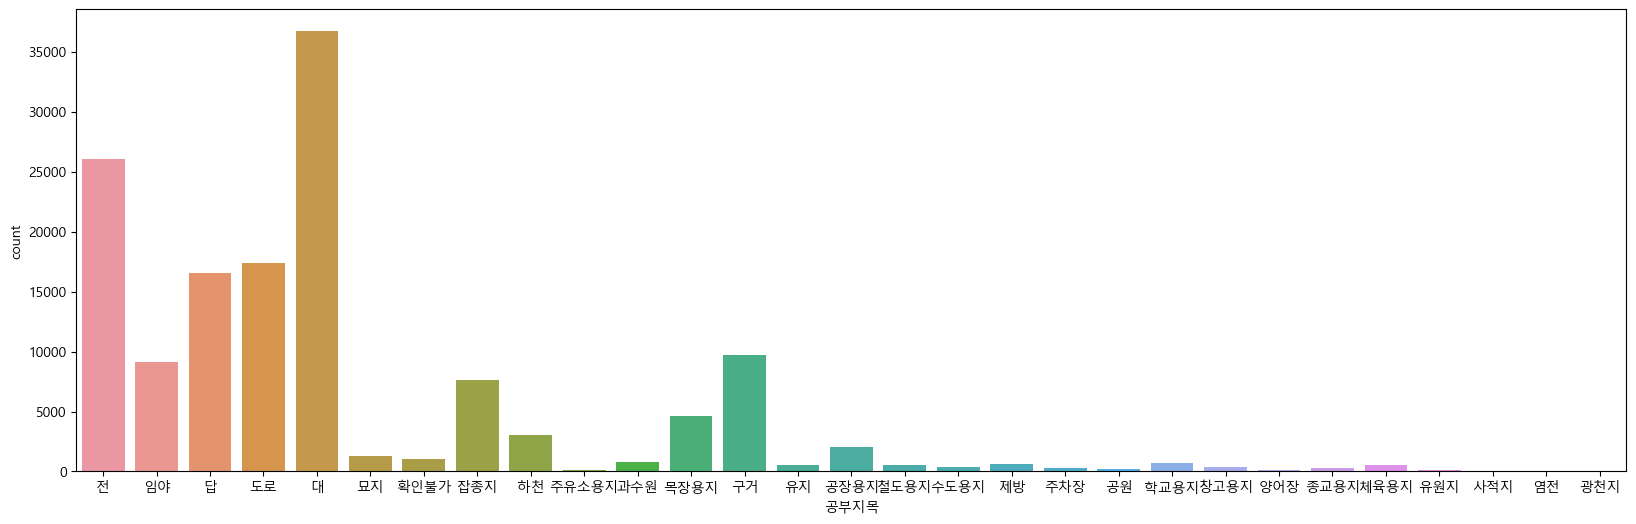

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
sns.countplot(x='공부지목', data=land)

In [41]:
land.describe()

,연도구분,대장면적(제곱미터),대장금액(원)
count,140952.000000,1.409520e+05,1.409520e+05
mean,2017.637316,5.701043e+02,6.073852e+07
std,2.516110,9.306839e+03,1.519860e+09
min,2014.000000,1.000000e-01,1.000000e+00
25%,2016.000000,3.000000e+01,1.365450e+06
50%,2017.000000,9.700000e+01,5.124000e+06
75%,2020.000000,3.190000e+02,1.874800e+07
max,2022.000000,2.024292e+06,3.670000e+11


In [42]:
land[land['대장금액(원)'] <= land['대장금액(원)'].quantile(q=0.01)]

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
280,2014,울산광역시,울산광역시 북구 산하동 920-32,토지,하천,1.0,15800.0,처분(매각수의),2014-01-07,국유재산관리부,국유울산팀
762,2014,전라남도,전라남도 담양군 수북면 궁산리 544-4,토지,임야,1.0,4950.0,처분(매각수의),2014-01-16,광주전남지역본부,국유광주1팀
786,2014,전라북도,전라북도 김제시 죽산면 연포리 617-36,토지,답,3.0,20400.0,처분(매각수의),2014-01-16,전북지역본부,국유재산관리2팀
1012,2014,충청남도,충청남도 공주시 사곡면 계실리 368-15,토지,구거,1.0,4950.0,처분(무상관리전환),2014-01-20,대전충남지역본부,국유재산관리2팀
1396,2014,전라남도,전라남도 고흥군 도화면 발포리 산 2-2,토지,임야,1.0,532.0,처분(매각수의),2014-01-24,광주전남지역본부,국유여수팀
...,...,...,...,...,...,...,...,...,...,...,...
140440,2022,경상남도,경상남도 의령군 의령읍 서동리 533-1,토지,구거,1.0,18200.0,처분(매각수의),2022-12-30,경남지역본부,국유재산관리1팀
140656,2022,경상남도,경상남도 하동군 화개면 탑리 868-7,토지,전,10.0,18400.0,처분(매각수의),2022-01-18,경남지역본부,국유진주지사
140749,2022,경상남도,경상남도 함양군 수동면 하교리 산 31-3,토지,구거,1.0,3150.0,처분(매각수의),2022-02-18,경남지역본부,국유진주지사
140769,2022,경상남도,경상남도 거창군 가조면 도리 1529-215,토지,대,5.0,10850.0,처분(매각수의),2022-01-05,경남지역본부,국유진주지사


In [43]:
m = land[land['처분구분명'] == '처분(무상귀속)']

In [44]:
m.sort_values('대장금액(원)')

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
118946,2021,경기도,경기도 부천시 삼정동 3-54,토지,답,97.0,1.000000e+00,처분(무상귀속),2021-02-10,인천지역본부,국유재산3팀
130979,2022,경기도,경기도 수원시 권선구 서둔동 320-2,토지,도로,7.0,1.000000e+01,처분(무상귀속),2022-10-19,경기지역본부,국유재산3팀
86606,2018,인천광역시,인천광역시 중구 중산동 1-40,토지,도로,1016.0,5.000000e+01,처분(무상귀속),2018-08-02,인천지역본부,국유재산2팀
82782,2018,인천광역시,인천광역시 중구 중산동 1-40,토지,도로,1016.0,5.000000e+01,처분(무상귀속),2018-08-02,인천지역본부,국유재산2팀
117712,2021,울산광역시,울산광역시 남구 무거동 503-2,토지,도로,4.0,2.308000e+04,처분(무상귀속),2021-02-24,부산지역본부,울산지사
...,...,...,...,...,...,...,...,...,...,...,...
118933,2021,경기도,경기도 부천시 오정동 428-111,토지,제방,3010.0,9.715377e+08,처분(무상귀속),2021-02-10,인천지역본부,국유재산3팀
126690,2021,울산광역시,울산광역시 동구 서부동 257-7,토지,구거,1274.0,1.043279e+09,처분(무상귀속),2021-11-12,부산지역본부,울산지사
130845,2022,울산광역시,울산광역시 북구 효문동 934-4,토지,하천,199.0,1.082320e+09,처분(무상귀속),2022-01-05,부산지역본부,울산지사
132511,2022,경기도,경기도 용인시 기흥구 구갈동 20-8,토지,잡종지,3584.0,1.091328e+09,처분(무상귀속),2022-06-16,경기지역본부,국유재산2팀


In [45]:
land['계약일자']

0         2014-01-01
1         2014-01-01
2         2014-01-01
3         2014-01-01
4         2014-01-01
             ...    
140947    2022-11-09
140948    2022-12-29
140949    2022-12-29
140950    2022-08-04
140951    2022-11-22
Name: 계약일자, Length: 140952, dtype: object

In [46]:
land['연도구분'].info()

<class 'pandas.core.series.Series'>
Int64Index: 140952 entries, 0 to 140951
Series name: 연도구분
Non-Null Count   Dtype
--------------   -----
140952 non-null  int64
dtypes: int64(1)
memory usage: 2.2 MB


In [ ]:
 #############################
#   아래는 참고용 (실행 X)  #
############################

In [345]:
y_int = land['계약일자'].apply(lambda x: x.split('-')[0]).astype('int')
y_int

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
140947    2022
140948    2022
140949    2022
140950    2022
140951    2022
Name: 계약일자, Length: 140952, dtype: int32

In [346]:
y_int.min()

2000

In [347]:
y_int.max()

2022

In [ ]:
# land[land['연도구분'] != y_int]

In [ ]:
# land['연도구분'] = [y_int[i] for i in range(len(land))]

In [ ]:
# land_2 = land.copy()

In [ ]:
# land_2['계약연도'] = y_int

In [ ]:
# land[land['연도구분'] != land_2['계약연도'] ]

## 1. 매각 금액이 가장 많은 팀과 하위 팀의 차이 확인하기

In [49]:
land['부서와 팀명'] = land['부점명']+' '+land['팀명']

In [50]:
land.head()

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀,국유재산관리부 국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀,전북지역본부 국유재산관리2팀


In [ ]:
# 합계말고 개별 매각 금액이 큰 팀 확인

In [51]:
amount_high = land[land['대장금액(원)'] == land['대장금액(원)'].max()]
print('팀명: ', amount_high['부서와 팀명'])
print('최대값: ', land['대장금액(원)'].max())

팀명:  118163    서울동부지역본부 국유재산3팀
Name: 부서와 팀명, dtype: object
최대값:  367000000000.0


In [52]:
amount_low = land[land['대장금액(원)'] == land['대장금액(원)'].min()]
print('팀명: ', amount_low['부서와 팀명'])
print('최소값: ', land['대장금액(원)'].min())

팀명:  20554     경기지역본부 국유재산관리1팀
25933        경남지역본부 국유통영팀
30772     대구경북지역본부 국유 안동팀
30776     대구경북지역본부 국유 안동팀
66232     광주전남지역본부 국유광주2팀
118946      인천지역본부 국유재산3팀
Name: 부서와 팀명, dtype: object
최소값:  1.0


In [53]:
print('매각 금액이 가장 높은 금액 : ', land['대장금액(원)'].max())
print('매각 금액이 가장 낮은 금액 : ', land['대장금액(원)'].min())
print('매각 금액 차이 : ', land['대장금액(원)'].max() - land['대장금액(원)'].min())

매각 금액이 가장 높은 금액 :  367000000000.0
매각 금액이 가장 낮은 금액 :  1.0
매각 금액 차이 :  366999999999.0


In [54]:
land['부서와 팀명'].unique()

array(['전북지역본부 국유재산관리1팀', '국유재산관리부 국유울산팀', '전북지역본부 국유재산관리2팀',
       '국유재산관리부 국유재산관리1팀', '강원지역본부 국유춘천팀', '대구경북지역본부 국유재산관리2팀',
       '광주전남지역본부 국유목포팀', '광주전남지역본부 국유여수팀', '광주전남지역본부 국유제주팀', '강원지역본부 국유팀',
       '광주전남지역본부 국유광주2팀', '강원지역본부 국유원주팀', '대전충남지역본부 국유재산관리1팀',
       '경남지역본부 국유진주팀', '대전충남지역본부 내포지부', '충북지역본부 국유재산관리팀', '충북지역본부 국유 충주팀',
       '인천지역본부 국유재산관리팀', '대전충남지역본부 국유재산관리2팀', '대구경북지역본부 국유재산관리1팀',
       '경남지역본부 국유재산관리2팀', '경남지역본부 국유재산관리1팀', '서울국유재산부 재산관리3팀',
       '경기지역본부 국유재산관리1팀', '전북지역본부 국유군산팀', '국유재산관리부 국유재산관리3팀',
       '대구경북지역본부 국유 안동팀', '대구경북지역본부 국유 포항팀', '경기지역본부 국유재산관리2팀',
       '국유재산관리부 국유재산관리2팀', '서울국유재산부 의정부팀', '서울국유재산부 재산관리2팀',
       '광주전남지역본부 국유광주1팀', '경기지역본부 국유평택팀', '서울국유재산부 재산관리1팀',
       '서울국유재산부 재산관리5팀', '경남지역본부 국유통영팀', '서울국유재산부 재산관리4팀',
       '서울국유재산부 재산관리6팀', '경남지역본부 팀미정', '강원지역본부 팀미정', '서울국유재산부 팀미정',
       '광주전남지역본부 팀미정', '대구경북지역본부 팀미정', '인천지역본부 팀미정', '광주전남지역본부 국유목포지부',
       '광주전남지역본부 국유여수지부', '광주전남지역본부 국유제주지부', '충북지역본부 팀미정',
       '대구경북지역본부 포항지부', '대

In [55]:
land['팀명'].unique()

array(['국유재산관리1팀', '국유울산팀', '국유재산관리2팀', '국유춘천팀', '국유목포팀', '국유여수팀',
       '국유제주팀', '국유팀', '국유광주2팀', '국유원주팀', '국유진주팀', '내포지부', '국유재산관리팀',
       '국유 충주팀', '재산관리3팀', '국유군산팀', '국유재산관리3팀', '국유 안동팀', '국유 포항팀',
       '의정부팀', '재산관리2팀', '국유광주1팀', '국유평택팀', '재산관리1팀', '재산관리5팀', '국유통영팀',
       '재산관리4팀', '재산관리6팀', '팀미정', '국유목포지부', '국유여수지부', '국유제주지부', '포항지부',
       '안동지부', '국유재산1팀', '국유재산3팀', '의정부지부', '국유광주3팀', '국유재산2팀', '울산지부',
       '국유재산관리4팀', '기획관리팀', '원주지부', '국유1팀', '국유2팀', '춘천지부', '국유진주지부',
       '국유통영지부', '국유광주4팀', '국유목포지사', '국유여수지사', '내포지사', '충주지사', '군산지사',
       '국유진주지사', '국유통영지사', '포항지사', '안동지사', '국유제주지사', '울산지사', '국유재산관리5팀',
       '평택지사', '의정부지사', '원주지사', '춘천지사', '해안면무주지국유화지원추진단'], dtype=object)

In [56]:
land[land['팀명'] == '팀미정']

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명
16566,2014,경상남도,경상남도 거제시 동부면 오송리 882-1,토지,도로,40.0,296800.0,처분(매각수의),2014-12-23,경남지역본부,팀미정,경남지역본부 팀미정
20961,2015,강원도,강원도 횡성군 서원면 석화리 941-1,토지,전,128.0,3008000.0,처분(매각수의),2015-04-07,강원지역본부,팀미정,강원지역본부 팀미정
21392,2015,서울특별시,서울특별시 노원구 월계동 674-1,토지,전,11.0,6138000.0,처분(매각수의),2015-04-15,서울국유재산부,팀미정,서울국유재산부 팀미정
21393,2015,서울특별시,서울특별시 노원구 월계동 674,토지,전,35.0,19530000.0,처분(매각수의),2015-04-15,서울국유재산부,팀미정,서울국유재산부 팀미정
21635,2015,경상남도,경상남도 거제시 둔덕면 술역리 791-23,토지,대,14.0,1177400.0,처분(매각수의),2015-04-20,경남지역본부,팀미정,경남지역본부 팀미정
...,...,...,...,...,...,...,...,...,...,...,...,...
100086,2019,경기도,경기도 연천군 연천읍 동막리 573-14,토지,전,176.0,5561600.0,처분(무상관리전환),2019-08-14,서울서부지역본부,팀미정,서울서부지역본부 팀미정
106264,2020,강원도,강원도 양구군 해안면 후리 1259,토지,답,1408.0,9815851.0,처분(매각수의),2020-04-20,강원지역본부,팀미정,강원지역본부 팀미정
115572,2020,경기도,경기도 화성시 송동 681-981,토지,답,18.0,527400.0,처분(무상귀속),2019-10-07,경기지역본부,팀미정,경기지역본부 팀미정
125978,2021,제주특별자치도,제주특별자치도 서귀포시 토평동 1922-1,건물,확인불가,7.0,116490.0,처분(매각수의),2021-07-26,국유재산기획처,팀미정,국유재산기획처 팀미정


In [57]:
land.groupby('부서와 팀명')['대장금액(원)'].sum().max()

643457006430.0

In [350]:
land.groupby('부서와 팀명')['대장금액(원)'].sum().min()

15087644.0

In [58]:
l = (land.groupby('부서와 팀명')['대장금액(원)'].sum()).sort_values()
l

부서와 팀명
국유재산기획처 팀미정               1.508764e+07
국유재산기획처 해안면무주지국유화지원추진단    2.210196e+07
서울국유재산부 팀미정               2.566800e+07
충북지역본부 팀미정                8.017864e+07
인천지역본부 팀미정                8.895815e+07
                              ...     
서울국유재산부 재산관리2팀            2.795060e+11
경기지역본부 국유재산2팀             3.755818e+11
서울서부지역본부 국유재산1팀           4.153402e+11
서울동부지역본부 국유재산3팀           5.455068e+11
서울서부지역본부 국유재산3팀           6.434570e+11
Name: 대장금액(원), Length: 112, dtype: float64

In [351]:
l[1]

22101960.0

In [352]:
# 1. 매각금액이 가장 많은 팀과 하위 팀의 차이
l[-1] - l[1]

643434904470.0

In [353]:
land[land['부서와 팀명'] == '국유재산기획처 해안면무주지국유화지원추진단']

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명,면적 대비 금액,seoul
118647,2021,강원도,강원도 양구군 해안면 후리 631,토지,전,807.00,4680600.00,처분(매각수의),2021-09-10,국유재산기획처,해안면무주지국유화지원추진단,국유재산기획처 해안면무주지국유화지원추진단,5800.00,False
118648,2021,강원도,강원도 양구군 해안면 후리 632,토지,전,496.00,2797440.00,처분(매각수의),2021-09-10,국유재산기획처,해안면무주지국유화지원추진단,국유재산기획처 해안면무주지국유화지원추진단,5640.00,False
118649,2021,강원도,강원도 양구군 해안면 후리 633,토지,전,893.00,5036520.00,처분(매각수의),2021-09-10,국유재산기획처,해안면무주지국유화지원추진단,국유재산기획처 해안면무주지국유화지원추진단,5640.00,False
118650,2021,강원도,강원도 양구군 해안면 후리 634,토지,전,1653.00,9587400.00,처분(매각수의),2021-09-10,국유재산기획처,해안면무주지국유화지원추진단,국유재산기획처 해안면무주지국유화지원추진단,5800.00,False


In [60]:
land[land['부서와 팀명'] == '서울서부지역본부 국유재산3팀']

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명
98334,2019,서울특별시,서울특별시 중구 쌍림동 151-168,토지,대,3.0,3.428700e+06,처분(매각수의),2019-04-29,서울서부지역본부,국유재산3팀,서울서부지역본부 국유재산3팀
98335,2019,서울특별시,서울특별시 중구 장충동2가 192-171,토지,대,27.0,1.059786e+08,처분(매각수의),2019-12-20,서울서부지역본부,국유재산3팀,서울서부지역본부 국유재산3팀
98336,2019,서울특별시,서울특별시 중구 예관동 55-8,토지,대,1.0,7.798000e+06,처분(매각수의),2019-05-23,서울서부지역본부,국유재산3팀,서울서부지역본부 국유재산3팀
98337,2019,서울특별시,서울특별시 중구 예관동 53-15,토지,대,1.0,1.051960e+07,처분(매각수의),2019-05-23,서울서부지역본부,국유재산3팀,서울서부지역본부 국유재산3팀
98338,2019,서울특별시,서울특별시 중구 예관동 53-11,토지,대,6.0,5.622400e+07,처분(매각수의),2019-05-23,서울서부지역본부,국유재산3팀,서울서부지역본부 국유재산3팀
...,...,...,...,...,...,...,...,...,...,...,...,...
127631,2022,서울특별시,서울특별시 영등포구 신길동 1375-1,토지,대,304.0,1.748000e+09,처분(매각수의),2022-05-26,서울서부지역본부,국유재산3팀,서울서부지역본부 국유재산3팀
127632,2022,서울특별시,서울특별시 영등포구 신길동 1375-2,토지,대,77.0,4.427500e+08,처분(매각수의),2022-05-26,서울서부지역본부,국유재산3팀,서울서부지역본부 국유재산3팀
127633,2022,서울특별시,서울특별시 영등포구 신길동 1376-3,토지,공원,51.0,2.932500e+08,처분(매각수의),2022-05-26,서울서부지역본부,국유재산3팀,서울서부지역본부 국유재산3팀
127634,2022,서울특별시,서울특별시 영등포구 신길동 2871-5,토지,도로,13.0,9.505000e+07,처분(매각수의),2022-08-12,서울서부지역본부,국유재산3팀,서울서부지역본부 국유재산3팀


## 2. 연도별 매각금액 추이 확인하기

In [61]:
land.head(1)

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀


In [62]:
land_y_data = land.groupby('연도구분')['대장금액(원)'].sum()
land_y_data

연도구분
2014    8.367846e+11
2015    1.393510e+12
2016    5.790616e+11
2017    7.006424e+11
2018    6.131585e+11
2019    7.708615e+11
2020    7.466746e+11
2021    1.477221e+12
2022    1.443302e+12
Name: 대장금액(원), dtype: float64

In [63]:
land_y_data.min()

579061567969.0

In [64]:
land_y_data.max()

1477220860888.0

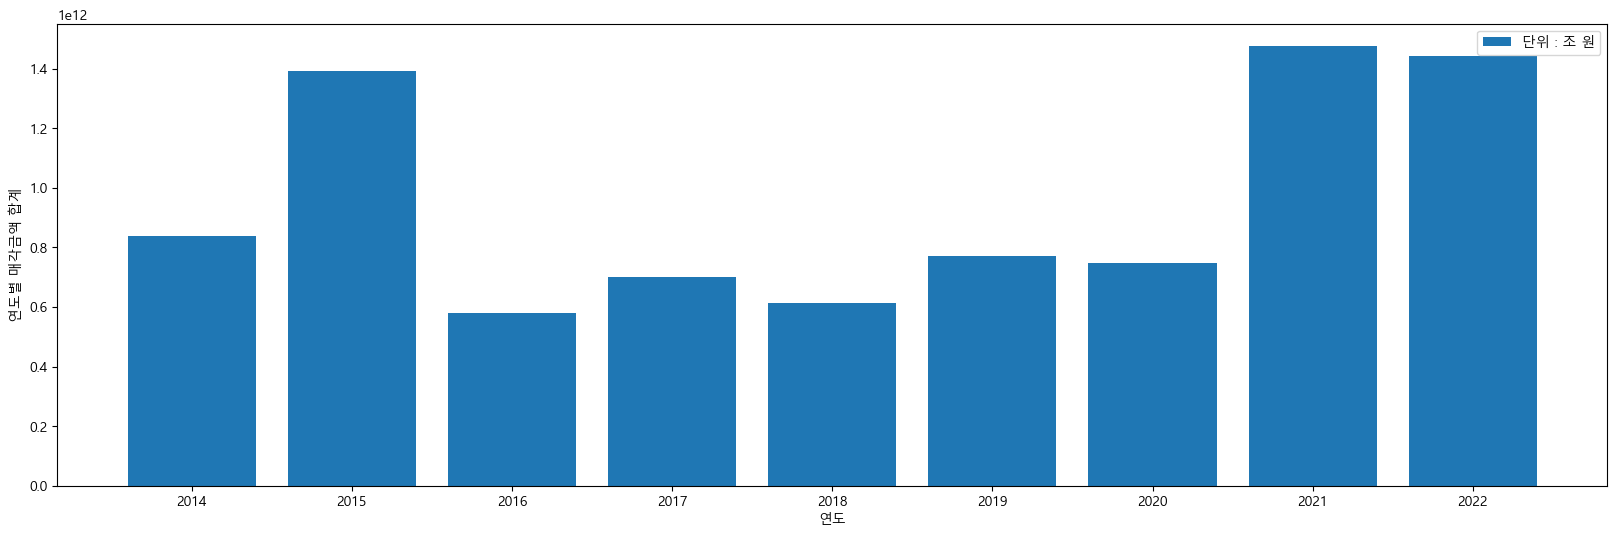

In [66]:
# matplotlib은 보여지는 값이 너무 많으면 하나 건더서 보여주고 seaborn은 다보여줌 
# matplotlib에서도 다 보여지게 하고 싶으면 plt.xticks을 사용하거나 그냥 seaborn 사용할 것 

land_x = land_y_data.index
land_y = land_y_data.values

fig, ax = plt.subplots(1, 1, figsize=(20, 6))
plt.bar(land_x, land_y, label='단위 : 조 원')

plt.xticks(land_y_data.index)

plt.legend(loc='upper right')

plt.xlabel('연도')
plt.ylabel('연도별 매각금액 합계')

plt.show()

In [67]:
land['면적 대비 금액'] = land['대장금액(원)'] / land['대장면적(제곱미터)']

In [68]:
land.head(1)

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명,면적 대비 금액
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀,178000.0


In [69]:
land['지역구분'].unique()

array(['전라북도', '울산광역시', '부산광역시', '강원도', '경상북도', '전라남도', '제주특별자치도', '충청남도',
       '경상남도', '대전광역시', '충청북도', '인천광역시', '세종특별자치시', '경기도', '대구광역시',
       '서울특별시', '광주광역시'], dtype=object)

In [70]:
JB = land[land['지역구분'] == '전라북도']

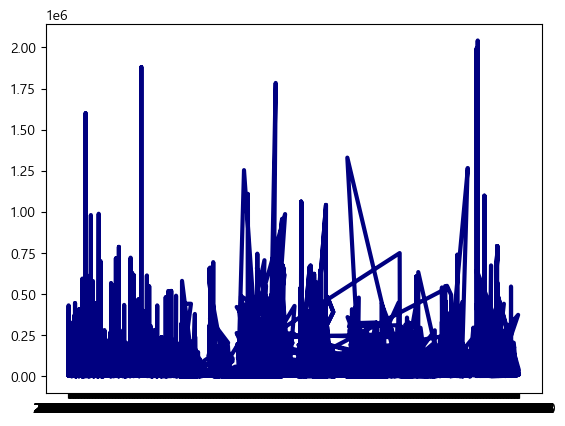

In [71]:
plt.plot(JB['계약일자'], JB['면적 대비 금액'], color="navy" , linewidth = 3)

## 3. 상위 5개 지역별 매각 면적 확인하기

In [72]:
land.head(3)

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명,면적 대비 금액
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀,178000.0
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀,국유재산관리부 국유울산팀,61200.0
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀,10240.0


In [73]:
area1 = land.groupby('지역구분')['대장금액(원)'].sum()

In [354]:
l1 = area1.nlargest(5, keep='first')
l1

지역구분
서울특별시   2913183262735.00
경기도     1990690896519.00
인천광역시    537960062279.00
충청남도     522411096759.00
부산광역시    521408966116.00
Name: 대장금액(원), dtype: float64

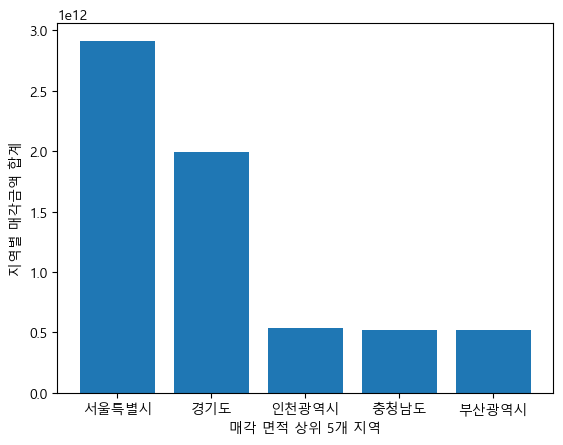

In [363]:
l_x = l1.index
l_y = l1.values

plt.bar(l_x, l_y)

plt.xticks(l1.index)

plt.xlabel('매각 면적 상위 5개 지역')
plt.ylabel('지역별 매각금액 합계')

plt.show()

In [75]:
area2 = land.groupby('지역구분')['대장면적(제곱미터)'].sum()

In [357]:
l2 = area2.nlargest(5, keep='first')
l2

지역구분
강원도    13355279.95
경기도    11199309.48
전라남도    9388504.74
충청남도    8580609.59
경상북도    7053822.67
Name: 대장면적(제곱미터), dtype: float64

In [ ]:
plt.xticks(land_y_data.index)

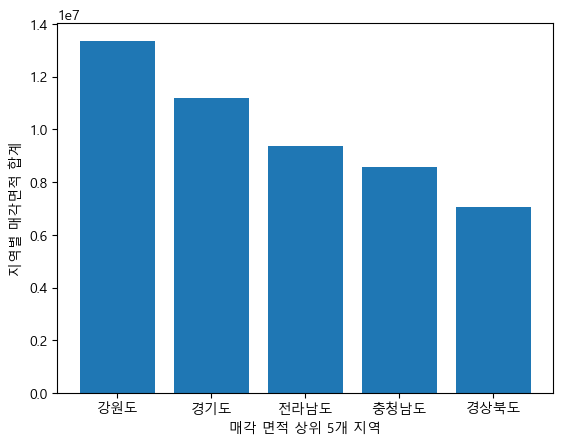

In [364]:
l_x_ = l2.index
l_y_= l2.values

plt.bar(l_x_, l_y_)

plt.xticks(l2.index)

plt.xlabel('매각 면적 상위 5개 지역')
plt.ylabel('지역별 매각면적 합계')

plt.show()

## 4. 계약 일자 정보 기준으로, 매각이 많은 때의 특징 알아보기

In [77]:
date_counts = land['계약일자'].value_counts()
date_counts

2017-12-01    600
2016-11-30    504
2022-07-25    486
2020-04-01    442
2019-08-29    432
             ... 
2017-02-12      1
2021-03-28      1
2017-02-05      1
2017-02-18      1
2022-01-23      1
Name: 계약일자, Length: 2784, dtype: int64

In [78]:
date_counts.quantile(0.75)

69.0

In [79]:
date_one = land[land['계약일자'] == '2017-12-01']
date_one

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명,면적 대비 금액
53039,2017,경기도,경기도 안성시 일죽면 방초리 81,토지,전,149.0,6287800.0,처분(매각입찰),2017-12-01,경기지역본부,국유평택팀,경기지역본부 국유평택팀,42200.000000
53115,2017,부산광역시,부산광역시 강서구 강동동 3944-23,토지,대,85.0,29926800.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,부산지역본부 국유재산관리4팀,352080.000000
53116,2017,부산광역시,부산광역시 강서구 강동동 4357-2,토지,대,195.0,76479000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,부산지역본부 국유재산관리4팀,392200.000000
53117,2017,부산광역시,부산광역시 강서구 강동동 4931-9,토지,전,86.0,6862800.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,부산지역본부 국유재산관리4팀,79800.000000
53118,2017,부산광역시,부산광역시 강서구 대저2동 5406-3,토지,대,360.0,133488000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,부산지역본부 국유재산관리1팀,370800.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75112,2017,경상남도,경상남도 합천군 합천읍 합천리 82-42,토지,전,61.0,1079700.0,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀,경남지역본부 국유진주팀,17700.000000
75114,2017,경상남도,경상남도 합천군 합천읍 합천리 96-16,토지,전,13.0,230100.0,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀,경남지역본부 국유진주팀,17700.000000
75115,2017,경상남도,경상남도 합천군 합천읍 합천리 82-37,토지,제방,424.0,8459850.0,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀,경남지역본부 국유진주팀,19952.476415
75116,2017,경상남도,경상남도 합천군 합천읍 합천리 82-43,토지,하천,175.0,2730000.0,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀,경남지역본부 국유진주팀,15600.000000


In [80]:
date_one.groupby(['지역구분']).count()

,연도구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명,면적 대비 금액
지역구분,,,,,,,,,,,,
강원도,5,5,5,5,5,5,5,5,5,5,5,5
경기도,11,11,11,11,11,11,11,11,11,11,11,11
경상남도,14,14,14,14,14,14,14,14,14,14,14,14
경상북도,14,14,14,14,14,14,14,14,14,14,14,14
대구광역시,1,1,1,1,1,1,1,1,1,1,1,1
부산광역시,528,528,528,528,528,528,528,528,528,528,528,528
전라남도,17,17,17,17,17,17,17,17,17,17,17,17
전라북도,4,4,4,4,4,4,4,4,4,4,4,4
제주특별자치도,2,2,2,2,2,2,2,2,2,2,2,2


In [81]:
busan = date_one[date_one['지역구분'] == '부산광역시']
busan

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명,면적 대비 금액
53115,2017,부산광역시,부산광역시 강서구 강동동 3944-23,토지,대,85.0,29926800.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,부산지역본부 국유재산관리4팀,352080.0
53116,2017,부산광역시,부산광역시 강서구 강동동 4357-2,토지,대,195.0,76479000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,부산지역본부 국유재산관리4팀,392200.0
53117,2017,부산광역시,부산광역시 강서구 강동동 4931-9,토지,전,86.0,6862800.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,부산지역본부 국유재산관리4팀,79800.0
53118,2017,부산광역시,부산광역시 강서구 대저2동 5406-3,토지,대,360.0,133488000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,부산지역본부 국유재산관리1팀,370800.0
53119,2017,부산광역시,부산광역시 강서구 대저2동 5980-8,토지,답,133.0,14563500.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,부산지역본부 국유재산관리1팀,109500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74673,2017,부산광역시,부산광역시 강서구 대저2동 6366-8,토지,답,435.0,36540000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,부산지역본부 국유재산관리1팀,84000.0
74674,2017,부산광역시,부산광역시 강서구 대저2동 6366-9,토지,답,503.0,42704700.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,부산지역본부 국유재산관리1팀,84900.0
74675,2017,부산광역시,부산광역시 강서구 대저2동 6366-10,토지,답,569.0,47909800.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,부산지역본부 국유재산관리1팀,84200.0
74930,2017,부산광역시,부산광역시 강서구 대저2동 5980-10,토지,잡종지,486.0,48065400.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,부산지역본부 국유재산관리1팀,98900.0


In [82]:
busan['재산구분'].unique()

array(['토지'], dtype=object)

In [83]:
busan['처분구분명'].unique()

array(['처분(매각수의)', '처분(매각입찰)'], dtype=object)

In [84]:
busan['부점명'].unique()

array(['부산지역본부'], dtype=object)

In [85]:
busan['팀명'].unique()

array(['국유재산관리4팀', '국유재산관리1팀', '국유재산관리2팀'], dtype=object)

In [86]:
busan.groupby('팀명')['대장금액(원)'].sum()

팀명
국유재산관리1팀    1.835892e+10
국유재산관리2팀    2.534400e+06
국유재산관리4팀    6.451777e+09
Name: 대장금액(원), dtype: float64

In [87]:
busan.groupby('팀명')['대장면적(제곱미터)'].sum()

팀명
국유재산관리1팀    185442.0
국유재산관리2팀        12.0
국유재산관리4팀     22277.0
Name: 대장면적(제곱미터), dtype: float64

In [88]:
busan.groupby('팀명').count()

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,부서와 팀명,면적 대비 금액
팀명,,,,,,,,,,,,
국유재산관리1팀,342,342,342,342,342,342,342,342,342,342,342,342
국유재산관리2팀,1,1,1,1,1,1,1,1,1,1,1,1
국유재산관리4팀,185,185,185,185,185,185,185,185,185,185,185,185


In [89]:
busan[busan['팀명'] == '국유재산관리2팀']

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명,면적 대비 금액
74988,2017,부산광역시,부산광역시 영도구 영선동4가 30-10,토지,대,12.0,2534400.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리2팀,부산지역본부 국유재산관리2팀,211200.0


In [90]:
busan[busan['팀명'] == '국유재산관리1팀']

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명,면적 대비 금액
53118,2017,부산광역시,부산광역시 강서구 대저2동 5406-3,토지,대,360.0,133488000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,부산지역본부 국유재산관리1팀,370800.0
53119,2017,부산광역시,부산광역시 강서구 대저2동 5980-8,토지,답,133.0,14563500.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,부산지역본부 국유재산관리1팀,109500.0
53590,2017,부산광역시,부산광역시 강서구 대저2동 4753-3,토지,답,17.0,4403000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,부산지역본부 국유재산관리1팀,259000.0
53591,2017,부산광역시,부산광역시 강서구 대저2동 4753-4,토지,답,3.0,777000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,부산지역본부 국유재산관리1팀,259000.0
53592,2017,부산광역시,부산광역시 강서구 대저2동 5404-10,토지,대,36.0,12258000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,부산지역본부 국유재산관리1팀,340500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74672,2017,부산광역시,부산광역시 강서구 대저2동 6366-7,토지,답,391.0,32844000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,부산지역본부 국유재산관리1팀,84000.0
74673,2017,부산광역시,부산광역시 강서구 대저2동 6366-8,토지,답,435.0,36540000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,부산지역본부 국유재산관리1팀,84000.0
74674,2017,부산광역시,부산광역시 강서구 대저2동 6366-9,토지,답,503.0,42704700.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,부산지역본부 국유재산관리1팀,84900.0
74675,2017,부산광역시,부산광역시 강서구 대저2동 6366-10,토지,답,569.0,47909800.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,부산지역본부 국유재산관리1팀,84200.0


In [91]:
busan[busan['팀명'] == '국유재산관리4팀']

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명,면적 대비 금액
53115,2017,부산광역시,부산광역시 강서구 강동동 3944-23,토지,대,85.0,29926800.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,부산지역본부 국유재산관리4팀,352080.0
53116,2017,부산광역시,부산광역시 강서구 강동동 4357-2,토지,대,195.0,76479000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,부산지역본부 국유재산관리4팀,392200.0
53117,2017,부산광역시,부산광역시 강서구 강동동 4931-9,토지,전,86.0,6862800.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,부산지역본부 국유재산관리4팀,79800.0
53571,2017,부산광역시,부산광역시 강서구 강동동 3700-3,토지,대,5.0,9203400.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,부산지역본부 국유재산관리4팀,1840680.0
53572,2017,부산광역시,부산광역시 강서구 강동동 3741-2,토지,답,13.0,2216500.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,부산지역본부 국유재산관리4팀,170500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61364,2017,부산광역시,부산광역시 강서구 강동동 4774-21,토지,대,15.0,5040000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,부산지역본부 국유재산관리4팀,336000.0
61365,2017,부산광역시,부산광역시 강서구 강동동 4837-5,토지,대,368.0,118164800.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,부산지역본부 국유재산관리4팀,321100.0
61366,2017,부산광역시,부산광역시 강서구 강동동 4904-9,토지,전,109.0,9875400.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,부산지역본부 국유재산관리4팀,90600.0
61367,2017,부산광역시,부산광역시 강서구 강동동 4904-10,토지,전,506.0,45843600.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,부산지역본부 국유재산관리4팀,90600.0


In [92]:
busan_1 = busan['소재지명'].apply(lambda x: x.split(' ')[1])
busan_2 = busan['소재지명'].apply(lambda x: x.split(' ')[2])

In [93]:
busan_1.value_counts()

강서구    523
금정구      3
영도구      2
Name: 소재지명, dtype: int64

In [94]:
busan_2.value_counts()

대저2동     339
강동동      184
두구동        3
청학동        1
영선동4가      1
Name: 소재지명, dtype: int64

## 5. 처분 구분별 비율 확인하기

In [95]:
sell = land.groupby('처분구분명')['연도구분'].count()

In [96]:
sell.index

Index(['처분(매각수의)', '처분(매각입찰)', '처분(무상관리전환)', '처분(무상귀속)', '처분(무상양여)',
       '처분(사용승인)', '처분(유상관리전환)', '처분(유상양여)'],
      dtype='object', name='처분구분명')

In [97]:
sell.values

array([124270,   8813,   4283,    706,    679,   2086,    114,      1],
      dtype=int64)

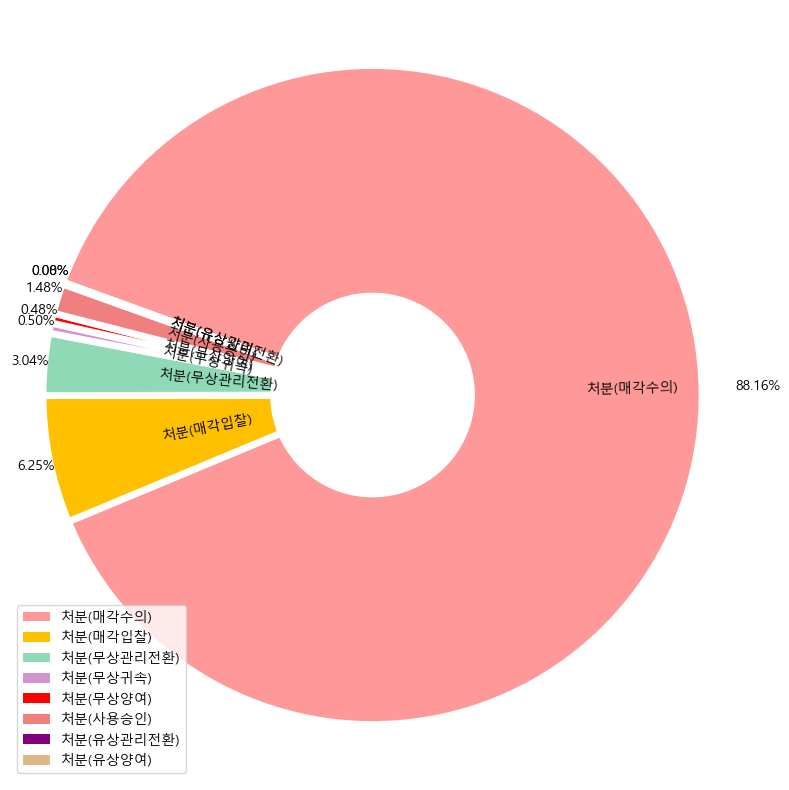

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

labels = sell.index
ratio = sell.values

colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'red','lightcoral','purple','burlywood']

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=160, counterclock=False, 
        colors=colors, wedgeprops=wedgeprops, pctdistance=1.1, labeldistance=0.65, 
        rotatelabels =True, textprops = dict(rotation_mode = 'anchor', va='center', ha='left'),)

plt.legend(patches, labels, loc="lower left")
plt.axis('equal')
plt.tight_layout()

In [144]:
sell_

처분구분명,처분(매각수의),처분(매각입찰),처분(무상관리전환),처분(무상귀속),처분(무상양여),처분(사용승인),처분(유상관리전환),처분(유상양여)
빈도수,124270.00,8813.00,4283.00,706.00,679.00,2086.00,114.00,1.00
비율,88.16,6.25,3.04,0.50,0.48,1.48,0.08,0.00


<Axes: xlabel='처분구분명', ylabel='count'>

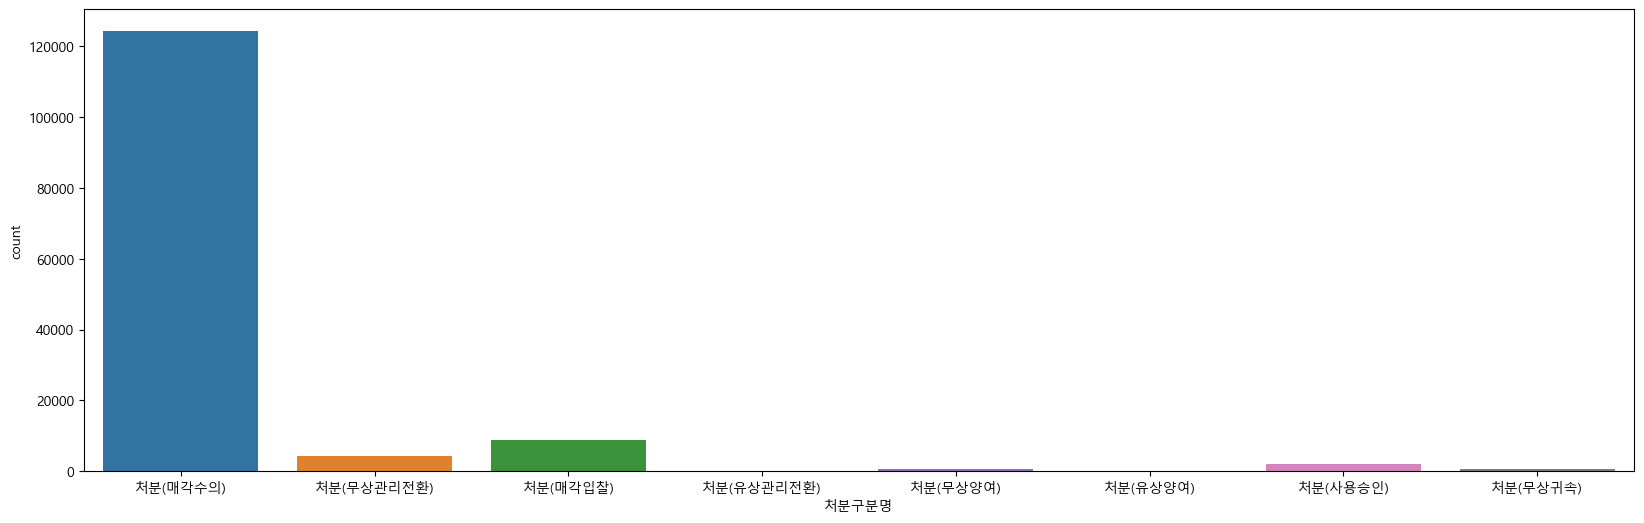

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
sns.countplot(x='처분구분명', data=land)

In [108]:
sell_['비율'] = None

In [109]:
sell_

,빈도수,비율
처분구분명,,
처분(매각수의),124270,None
처분(매각입찰),8813,None
처분(무상관리전환),4283,None
처분(무상귀속),706,None
처분(무상양여),679,None
처분(사용승인),2086,None
처분(유상관리전환),114,None
처분(유상양여),1,None


In [127]:
sell_sum = sell_['빈도수'].sum()
sell_sum

140952

In [124]:
sell_['빈도수'] = sell_['빈도수'].astype(int)

In [111]:
print(sell_.iloc[1][0])

8813


In [118]:
for i in range(len(sell_)):
    print(sell_.iloc[i][0])

124270
8813
4283
706
679
2086
114
1


In [136]:
for i in range(len(sell_)):
    sell_['비율'] = sell_['빈도수'] / sell_sum * 100

In [137]:
sell_

,빈도수,비율
처분구분명,,
처분(매각수의),124270,88.164765
처분(매각입찰),8813,6.252483
처분(무상관리전환),4283,3.038623
처분(무상귀속),706,0.500880
처분(무상양여),679,0.481724
처분(사용승인),2086,1.479936
처분(유상관리전환),114,0.080879
처분(유상양여),1,0.000709


In [140]:
pd.options.display.float_format = '{:.2f}'.format

In [138]:
sell_ = sell_.transpose()

In [141]:
sell_

처분구분명,처분(매각수의),처분(매각입찰),처분(무상관리전환),처분(무상귀속),처분(무상양여),처분(사용승인),처분(유상관리전환),처분(유상양여)
빈도수,124270.00,8813.00,4283.00,706.00,679.00,2086.00,114.00,1.00
비율,88.16,6.25,3.04,0.50,0.48,1.48,0.08,0.00


## 6. 필수-3 항목을 지역 규모에 따라 보정하기

In [145]:
land

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명,면적 대비 금액
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.00,9968000.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀,178000.00
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.00,13770000.00,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀,국유재산관리부 국유울산팀,61200.00
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.00,1075200.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀,10240.00
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.00,1884160.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀,10240.00
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.00,23797800.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀,전북지역본부 국유재산관리2팀,11300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140947,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.00,29952000.00,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사,광주전남지역본부 국유제주지사,144000.00
140948,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.00,56062200.00,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사,광주전남지역본부 국유제주지사,44600.00
140949,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.00,132640400.00,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사,광주전남지역본부 국유제주지사,44600.00
140950,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.00,32160000.00,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사,광주전남지역본부 국유제주지사,402000.00


In [146]:
# 출처1 : KOSIS, https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1ZGA17&conn_p-ath=I2
# 출처2 : 국토교통부「https://stat.molit.go.kr>지적통계」2022. 12월 기준

df2 = pd.read_csv('./data/지역별_면적_20230712142216.csv', encoding='cp949') 

In [147]:
df2

,지역구분,면적(킬로제곱미터)
0,서울특별시,605
1,부산광역시,770
2,대구광역시,884
3,인천광역시,1066
4,광주광역시,501
5,대전광역시,540
6,울산광역시,1062
7,세종특별자치시,465
8,경기도,10197
9,강원도,16830


In [148]:
df2['면적(제곱미터)'] = df2['면적(킬로제곱미터)'].astype(int)

In [149]:
df2['면적(제곱미터)'] = df2['면적(킬로제곱미터)'] * 10 ** 6

In [150]:
df2

,지역구분,면적(킬로제곱미터),면적(제곱미터)
0,서울특별시,605,605000000
1,부산광역시,770,770000000
2,대구광역시,884,884000000
3,인천광역시,1066,1066000000
4,광주광역시,501,501000000
5,대전광역시,540,540000000
6,울산광역시,1062,1062000000
7,세종특별자치시,465,465000000
8,경기도,10197,10197000000
9,강원도,16830,16830000000


In [151]:
area1 = land.groupby('지역구분')['대장금액(원)'].sum()

In [152]:
area1.to_frame()

,대장금액(원)
지역구분,
강원도,264913630933.00
경기도,1990690896519.00
경상남도,332123971650.00
경상북도,248528543409.00
광주광역시,262518807245.00
대구광역시,234496900501.00
대전광역시,125606642257.00
부산광역시,521408966116.00
서울특별시,2913183262735.00


In [153]:
type(area1)

pandas.core.series.Series

In [154]:
land_area = pd.merge(land, df2, on = '지역구분')
land_area

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명,면적 대비 금액,면적(킬로제곱미터),면적(제곱미터)
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.00,9968000.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀,178000.00,8072,8072000000
1,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.00,1075200.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀,10240.00,8072,8072000000
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.00,1884160.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀,10240.00,8072,8072000000
3,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.00,23797800.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀,전북지역본부 국유재산관리2팀,11300.00,8072,8072000000
4,2014,전라북도,전라북도 김제시 검산동 산 60-2,토지,임야,298.00,3456800.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀,전북지역본부 국유재산관리2팀,11600.00,8072,8072000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140947,2022,광주광역시,광주광역시 광산구 지죽동 762-1,토지,잡종지,19.00,613700.00,처분(매각수의),2022-01-26,광주전남지역본부,국유재산관리4팀,광주전남지역본부 국유재산관리4팀,32300.00,501,501000000
140948,2022,광주광역시,광주광역시 광산구 용동 644-5,토지,잡종지,372.00,12015600.00,처분(매각수의),2022-01-26,광주전남지역본부,국유재산관리4팀,광주전남지역본부 국유재산관리4팀,32300.00,501,501000000
140949,2022,광주광역시,광주광역시 광산구 용동 646-1,토지,잡종지,86.00,3173400.00,처분(매각수의),2022-01-26,광주전남지역본부,국유재산관리4팀,광주전남지역본부 국유재산관리4팀,36900.00,501,501000000
140950,2022,광주광역시,광주광역시 광산구 용동 665-31,토지,도로,60.00,5743800.00,처분(매각수의),2022-03-15,광주전남지역본부,국유재산관리4팀,광주전남지역본부 국유재산관리4팀,95730.00,501,501000000


In [158]:
area_won = land.groupby('지역구분')['대장금액(원)'].sum()
area_won.to_frame()

,대장금액(원)
지역구분,
강원도,264913630933.00
경기도,1990690896519.00
경상남도,332123971650.00
경상북도,248528543409.00
광주광역시,262518807245.00
대구광역시,234496900501.00
대전광역시,125606642257.00
부산광역시,521408966116.00
서울특별시,2913183262735.00


In [159]:
area_square = land.groupby('지역구분')['대장면적(제곱미터)'].sum()
area_square.to_frame()

,대장면적(제곱미터)
지역구분,
강원도,13355279.95
경기도,11199309.48
경상남도,6277678.63
경상북도,7053822.67
광주광역시,1416930.09
대구광역시,643206.76
대전광역시,396875.58
부산광역시,3048544.41
서울특별시,3206044.10


In [162]:
land_area = pd.merge(area_won, area_square, on = '지역구분')
land_area

,대장금액(원),대장면적(제곱미터)
지역구분,,
강원도,264913630933.00,13355279.95
경기도,1990690896519.00,11199309.48
경상남도,332123971650.00,6277678.63
경상북도,248528543409.00,7053822.67
광주광역시,262518807245.00,1416930.09
대구광역시,234496900501.00,643206.76
대전광역시,125606642257.00,396875.58
부산광역시,521408966116.00,3048544.41
서울특별시,2913183262735.00,3206044.10


In [163]:
land_area = pd.merge(land_area, df2, on = '지역구분')
land_area

,지역구분,대장금액(원),대장면적(제곱미터),면적(킬로제곱미터),면적(제곱미터)
0,강원도,264913630933.00,13355279.95,16830,16830000000
1,경기도,1990690896519.00,11199309.48,10197,10197000000
2,경상남도,332123971650.00,6277678.63,10542,10542000000
3,경상북도,248528543409.00,7053822.67,19035,19035000000
4,광주광역시,262518807245.00,1416930.09,501,501000000
5,대구광역시,234496900501.00,643206.76,884,884000000
6,대전광역시,125606642257.00,396875.58,540,540000000
7,부산광역시,521408966116.00,3048544.41,770,770000000
8,서울특별시,2913183262735.00,3206044.10,605,605000000
9,세종특별자치시,29920765740.00,283427.30,465,465000000


In [165]:
land_area['전체 면적 대비 매각 면적'] = None

In [168]:
for i in range(len(land_area)):
    land_area['전체 면적 대비 매각 면적'] = land_area['대장면적(제곱미터)'] / land_area['면적(제곱미터)'] * 100

In [169]:
land_area

,지역구분,대장금액(원),대장면적(제곱미터),면적(킬로제곱미터),면적(제곱미터),전체 면적 대비 매각 면적
0,강원도,264913630933.00,13355279.95,16830,16830000000,0.08
1,경기도,1990690896519.00,11199309.48,10197,10197000000,0.11
2,경상남도,332123971650.00,6277678.63,10542,10542000000,0.06
3,경상북도,248528543409.00,7053822.67,19035,19035000000,0.04
4,광주광역시,262518807245.00,1416930.09,501,501000000,0.28
5,대구광역시,234496900501.00,643206.76,884,884000000,0.07
6,대전광역시,125606642257.00,396875.58,540,540000000,0.07
7,부산광역시,521408966116.00,3048544.41,770,770000000,0.40
8,서울특별시,2913183262735.00,3206044.10,605,605000000,0.53
9,세종특별자치시,29920765740.00,283427.30,465,465000000,0.06


In [172]:
land_area[land_area['전체 면적 대비 매각 면적'] == land_area['전체 면적 대비 매각 면적'].max()]

,지역구분,대장금액(원),대장면적(제곱미터),면적(킬로제곱미터),면적(제곱미터),전체 면적 대비 매각 면적
8,서울특별시,2913183262735.00,3206044.10,605,605000000,0.53


In [173]:
land_area[land_area['전체 면적 대비 매각 면적'] == land_area['전체 면적 대비 매각 면적'].min()]

,지역구분,대장금액(원),대장면적(제곱미터),면적(킬로제곱미터),면적(제곱미터),전체 면적 대비 매각 면적
3,경상북도,248528543409.00,7053822.67,19035,19035000000,0.04


In [183]:
land_area.sort_values('전체 면적 대비 매각 면적', ascending=False).head(5)

,지역구분,대장금액(원),대장면적(제곱미터),면적(킬로제곱미터),면적(제곱미터),전체 면적 대비 매각 면적
8,서울특별시,2913183262735.00,3206044.10,605,605000000,0.53
7,부산광역시,521408966116.00,3048544.41,770,770000000,0.40
4,광주광역시,262518807245.00,1416930.09,501,501000000,0.28
11,인천광역시,537960062279.00,1794582.48,1066,1066000000,0.17
1,경기도,1990690896519.00,11199309.48,10197,10197000000,0.11


## 7. 필수-2 항목을 증감액 그래프로 표현하기

In [184]:
land

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명,면적 대비 금액
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.00,9968000.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀,178000.00
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.00,13770000.00,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀,국유재산관리부 국유울산팀,61200.00
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.00,1075200.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀,10240.00
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.00,1884160.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀,10240.00
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.00,23797800.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀,전북지역본부 국유재산관리2팀,11300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140947,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.00,29952000.00,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사,광주전남지역본부 국유제주지사,144000.00
140948,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.00,56062200.00,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사,광주전남지역본부 국유제주지사,44600.00
140949,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.00,132640400.00,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사,광주전남지역본부 국유제주지사,44600.00
140950,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.00,32160000.00,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사,광주전남지역본부 국유제주지사,402000.00


In [187]:
land_y_data = land_y_data.to_frame()

In [188]:
land_y_data

,대장금액(원)
연도구분,
2014,836784640709.00
2015,1393509693213.00
2016,579061567969.00
2017,700642418186.00
2018,613158548354.00
2019,770861517616.00
2020,746674621620.00
2021,1477220860888.00
2022,1443301922621.00


In [190]:
land_y_data.iloc[1][0] *3

4180529079639.0

In [197]:
land_y_data['증감액'] = None

In [205]:
for i in range(1, len(land_y_data)-1):
    print(i)

1
2
3
4
5
6
7


In [215]:
for i in land_y_data.index:
    if i != 2014:
        print(i)

2015
2016
2017
2018
2019
2020
2021
2022


In [222]:
land_y_data['대장금액(원)'][2014]

836784640709.0

In [223]:
for i in land_y_data.index:
    if i != 2014:
        land_y_data['증감액'][i] = land_y_data['대장금액(원)'][i] - land_y_data['대장금액(원)'][i-1]

In [232]:
land_y_data

,대장금액(원),증감액
연도구분,,
2014,836784640709.00,-33918938267.00
2015,1393509693213.00,556725052504.00
2016,579061567969.00,-814448125244.00
2017,700642418186.00,121580850217.00
2018,613158548354.00,-87483869832.00
2019,770861517616.00,157702969262.00
2020,746674621620.00,-24186895996.00
2021,1477220860888.00,730546239268.00
2022,1443301922621.00,-33918938267.00


In [245]:
land_y_data = land_y_data.drop(2014, axis=0)

In [247]:
land_y_data

,대장금액(원),증감액
연도구분,,
2015,1393509693213.00,556725052504.00
2016,579061567969.00,-814448125244.00
2017,700642418186.00,121580850217.00
2018,613158548354.00,-87483869832.00
2019,770861517616.00,157702969262.00
2020,746674621620.00,-24186895996.00
2021,1477220860888.00,730546239268.00
2022,1443301922621.00,-33918938267.00


In [249]:
# 마이너스 부호 깨질때
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

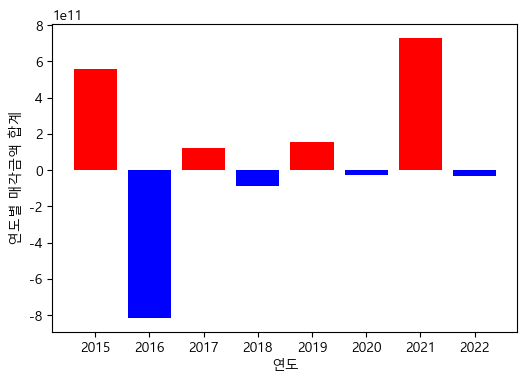

In [272]:
land_x = land_y_data.index
land_y = land_y_data['증감액']

colors = ['r', 'b']

fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(land_x, land_y, 
        color = colors, alpha = 1, width = 0.8)

plt.xticks(land_y_data.index)

plt.xlabel('연도')
plt.ylabel('연도별 매각금액 합계')

plt.show()

## 추가 분석

In [274]:
land['지역구분'].unique()

array(['전라북도', '울산광역시', '부산광역시', '강원도', '경상북도', '전라남도', '제주특별자치도', '충청남도',
       '경상남도', '대전광역시', '충청북도', '인천광역시', '세종특별자치시', '경기도', '대구광역시',
       '서울특별시', '광주광역시'], dtype=object)

In [275]:
# 수도권과 비수도권 그룹 분리하기

seoul = ['서울특별시', '경기도', '인천광역시']

In [290]:
land['seoul'] = None

In [292]:
for i in range(len(land)):
    if land.iloc[i, 1] == '서울특별시':
        land.iloc[i, 13] = True
    elif land.iloc[i, 1] == '경기도':
        land.iloc[i, 13] = True
    elif land.iloc[i, 1] == '인천광역시':
        land.iloc[i, 13] = True
    else:
        land.iloc[i, 13] = False

In [297]:
m = land['seoul'] == True

In [300]:
land

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,부서와 팀명,면적 대비 금액,seoul
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.00,9968000.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀,178000.00,False
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.00,13770000.00,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀,국유재산관리부 국유울산팀,61200.00,False
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.00,1075200.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀,10240.00,False
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.00,1884160.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,전북지역본부 국유재산관리1팀,10240.00,False
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.00,23797800.00,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀,전북지역본부 국유재산관리2팀,11300.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140947,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.00,29952000.00,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사,광주전남지역본부 국유제주지사,144000.00,False
140948,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.00,56062200.00,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사,광주전남지역본부 국유제주지사,44600.00,False
140949,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.00,132640400.00,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사,광주전남지역본부 국유제주지사,44600.00,False
140950,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.00,32160000.00,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사,광주전남지역본부 국유제주지사,402000.00,False


In [331]:
land_seoul = land[m]['면적 대비 금액']
land_n_seoul = land[-m]['면적 대비 금액']

In [332]:
land_seoul

43       242000.00
61       626149.76
62       264000.00
63       264000.00
75       120000.00
            ...   
134192    19100.00
134193    18389.97
134194    13600.00
134195    13600.00
134196   151160.00
Name: 면적 대비 금액, Length: 36676, dtype: float64

In [333]:
land_n_seoul

0        178000.00
1         61200.00
2         10240.00
3         10240.00
4         11300.00
            ...   
140947   144000.00
140948    44600.00
140949    44600.00
140950   402000.00
140951    15600.00
Name: 면적 대비 금액, Length: 104276, dtype: float64

In [334]:
from scipy import stats

In [335]:
# 등분산성 검사
stats.ks_2samp(land_seoul, land_n_seoul)

KstestResult(statistic=0.35056385718411553, pvalue=0.0, statistic_location=42190.0, statistic_sign=-1)

In [336]:
stats.shapiro(land_seoul)

ShapiroResult(statistic=0.039488017559051514, pvalue=0.0)

In [337]:
stats.shapiro(land_n_seoul)

ShapiroResult(statistic=0.02883976697921753, pvalue=0.0)

In [338]:
stats.ttest_ind(land_seoul, land_n_seoul)

Ttest_indResult(statistic=27.12054494252947, pvalue=1.4705120667493383e-161)

In [339]:
stats.ttest_ind(land_seoul, land_n_seoul, equal_var = False)

Ttest_indResult(statistic=16.886805589860135, pvalue=9.651045773145261e-64)

In [340]:
stats.mannwhitneyu(land_seoul, land_n_seoul)

MannwhitneyuResult(statistic=2833105621.0, pvalue=0.0)

In [343]:
land_seoul.describe().to_frame()

,면적 대비 금액
count,36676.00
mean,903593.91
std,8304070.47
min,0.01
25%,48400.00
50%,148570.00
75%,714559.62
max,1156837162.00


In [344]:
land_n_seoul.describe().to_frame()

,면적 대비 금액
count,104276.00
mean,166017.77
std,1695089.92
min,0.00
25%,9320.00
50%,31044.73
75%,134000.00
max,431194000.00


In [324]:
land_seoul2 = land[m]['대장금액(원)']
land_n_seoul2 = land[-m]['대장금액(원)']

In [325]:
# 등분산성 검사
stats.ks_2samp(land_seoul2, land_n_seoul2)

KstestResult(statistic=0.2524156803160967, pvalue=0.0, statistic_location=8330000.0, statistic_sign=-1)

In [326]:
stats.shapiro(land_seoul2)

ShapiroResult(statistic=0.01780170202255249, pvalue=0.0)

In [327]:
stats.shapiro(land_n_seoul2)

ShapiroResult(statistic=0.013859868049621582, pvalue=0.0)

In [328]:
stats.ttest_ind(land_seoul2, land_n_seoul2)

Ttest_indResult(statistic=12.846141357745388, pvalue=9.493449072295527e-38)

In [330]:
# 등분산성은 불만족
# 중심극한정리에 의해 표본수가 충분히 많으므로 정규성을 만족 
# 그래서 welch's t-test 사용

stats.ttest_ind(land_seoul2, land_n_seoul2, equal_var = False)

Ttest_indResult(statistic=8.036852684924114, pvalue=9.482666354987148e-16)

In [329]:
stats.mannwhitneyu(land_seoul2, land_n_seoul2)

MannwhitneyuResult(statistic=2575164930.5, pvalue=0.0)